In [113]:
import math
import numpy as np
import sympy as sp 
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


In [114]:
#Cargamos el CSV
properties=pd.read_csv("Propiedades - Defi.csv",header=0)

In [115]:
properties

,TEMP K,LIQUID RHOMX kmol/cum,LIQUID CPMX kJ/kmol-K,LIQUID MUMX cP,LIQUID HMX kJ/kmol,LIQUID TBUB K,LIQUID KMX kW/m-K,Composition
0,"293,15","54,5951","74,6121","1,34991",-287258,"365,231","0,00060659",5%
1,"294,15","54,5836","74,6009","1,31805",-287184,"365,231","0,000608036",5%
2,"295,15","54,5716","74,5909","1,28724",-287109,"365,231","0,000609469",5%
3,"296,15","54,559","74,582","1,25743",-287035,"365,231","0,000610889",5%
4,"297,15","54,5459","74,574","1,22858",-286960,"365,231","0,000612296",5%
...,...,...,...,...,...,...,...,...
723,"379,15","39,1761","60,169","59,1525",-307544,"379,15","0,000785977",35%
724,"380,15","38,6574","59,3941","75,5668",-308875,"380,15","0,00078973",35%
725,"381,15","38,1717","58,6497","95,3931",-310154,"381,15","0,000793227",35%
726,"382,15","37,7162","57,9346","119,063",-311381,"382,15","0,000796492",35%


In [116]:
#We capture the data frame information
properties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 728 entries, 0 to 727
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   TEMP K                 728 non-null    object
 1   LIQUID RHOMX kmol/cum  728 non-null    object
 2   LIQUID CPMX kJ/kmol-K  728 non-null    object
 3   LIQUID MUMX cP         728 non-null    object
 4   LIQUID HMX kJ/kmol     728 non-null    int64 
 5   LIQUID TBUB K          728 non-null    object
 6   LIQUID KMX kW/m-K      728 non-null    object
 7   Composition            728 non-null    object
dtypes: int64(1), object(7)
memory usage: 45.6+ KB


In [117]:
#We need to change the Dtype for all columns but #4

properties['TEMP K'] = properties['TEMP K'].str.replace(',', '.').astype(float)
properties['LIQUID RHOMX kmol/cum'] = properties['LIQUID RHOMX kmol/cum'].str.replace(',', '.').astype(float)
properties['LIQUID CPMX kJ/kmol-K'] = properties['LIQUID CPMX kJ/kmol-K'].str.replace(',', '.').astype(float)
properties['LIQUID MUMX cP'] = properties['LIQUID MUMX cP'].str.replace(',', '.').astype(float)
properties['LIQUID TBUB K'] = properties['LIQUID TBUB K'].str.replace(',', '.').astype(float)
properties['LIQUID KMX kW/m-K'] = properties['LIQUID KMX kW/m-K'].str.replace(',', '.').astype(float)


properties['Composition'] = properties['Composition'].str.replace('%', '').astype(float) / 100


properties['LIQUID HMX kJ/kmol'] = properties['LIQUID HMX kJ/kmol'].astype(float)


In [118]:
properties.info()
properties

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 728 entries, 0 to 727
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   TEMP K                 728 non-null    float64
 1   LIQUID RHOMX kmol/cum  728 non-null    float64
 2   LIQUID CPMX kJ/kmol-K  728 non-null    float64
 3   LIQUID MUMX cP         728 non-null    float64
 4   LIQUID HMX kJ/kmol     728 non-null    float64
 5   LIQUID TBUB K          728 non-null    float64
 6   LIQUID KMX kW/m-K      728 non-null    float64
 7   Composition            728 non-null    float64
dtypes: float64(8)
memory usage: 45.6 KB


,TEMP K,LIQUID RHOMX kmol/cum,LIQUID CPMX kJ/kmol-K,LIQUID MUMX cP,LIQUID HMX kJ/kmol,LIQUID TBUB K,LIQUID KMX kW/m-K,Composition
0,293.15,54.5951,74.6121,1.34991,-287258.0,365.231,0.000607,0.05
1,294.15,54.5836,74.6009,1.31805,-287184.0,365.231,0.000608,0.05
2,295.15,54.5716,74.5909,1.28724,-287109.0,365.231,0.000609,0.05
3,296.15,54.5590,74.5820,1.25743,-287035.0,365.231,0.000611,0.05
4,297.15,54.5459,74.5740,1.22858,-286960.0,365.231,0.000612,0.05
...,...,...,...,...,...,...,...,...
723,379.15,39.1761,60.1690,59.15250,-307544.0,379.150,0.000786,0.35
724,380.15,38.6574,59.3941,75.56680,-308875.0,380.150,0.000790,0.35
725,381.15,38.1717,58.6497,95.39310,-310154.0,381.150,0.000793,0.35
726,382.15,37.7162,57.9346,119.06300,-311381.0,382.150,0.000796,0.35


In [119]:
#Now we are interested in designing some graphics so we can understand the behavour of each property

#For LIQUID RHOMX kmol/cum
def graficar_propiedad_3d(properties, column_x, column_y, column_z):
    fig1= plt.figure()
    ax = fig1.add_subplot(111,projection='3d')


    Z = properties.pivot_table(index=column_y, columns=column_x, values=column_z)

   
    X, Y = np.meshgrid(Z.columns, Z.index)

    # Graficar la superficie
    ax.plot_surface(X, Y, Z.values, cmap='viridis')
    

    ax.set_xlabel(column_x)  
    ax.set_ylabel(column_y)  
    ax.set_zlabel(column_z)

    ax.set_title(f'Gráfica 3D de {column_z}')
    
    plt.show()


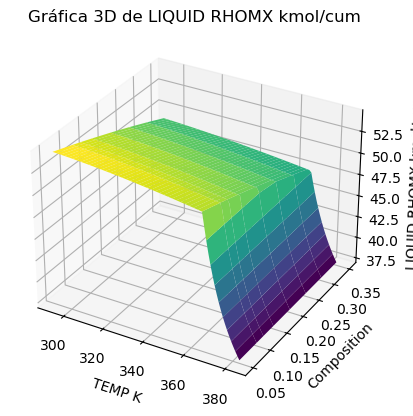

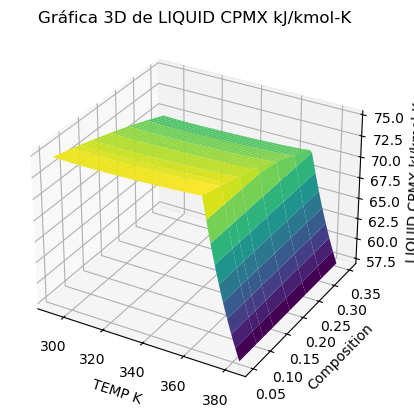

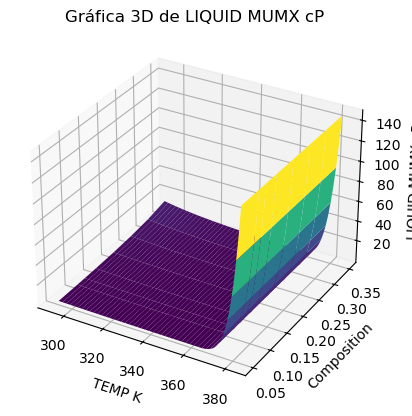

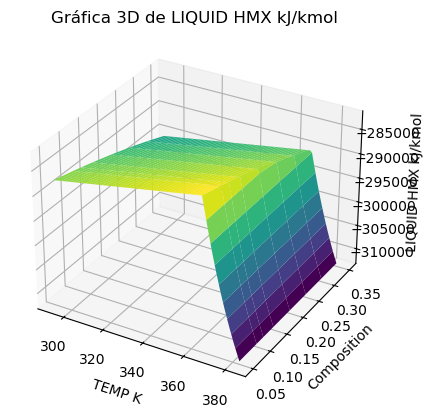

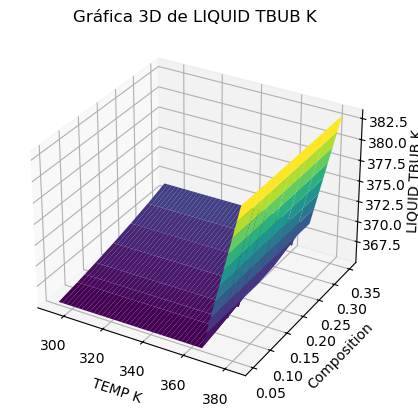

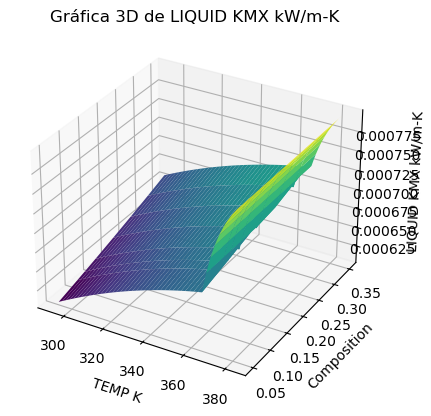

In [120]:
graficar_propiedad_3d(properties,column_x='TEMP K', column_y='Composition', column_z='LIQUID RHOMX kmol/cum')
graficar_propiedad_3d(properties,column_x='TEMP K', column_y='Composition', column_z='LIQUID CPMX kJ/kmol-K')
graficar_propiedad_3d(properties,column_x='TEMP K', column_y='Composition', column_z='LIQUID MUMX cP')
graficar_propiedad_3d(properties,column_x='TEMP K', column_y='Composition', column_z='LIQUID HMX kJ/kmol')
graficar_propiedad_3d(properties,column_x='TEMP K', column_y='Composition', column_z='LIQUID TBUB K')
graficar_propiedad_3d(properties,column_x='TEMP K', column_y='Composition', column_z='LIQUID KMX kW/m-K')




In [138]:
#Now we have an idea of each of the models behaviour
#For the models we must stablish which variables are indpendent and which arent


def training(properties):
   
    X = properties[['TEMP K', 'Composition']]
    
    
    properties_list = ['LIQUID RHOMX kmol/cum', 'LIQUID CPMX kJ/kmol-K', 'LIQUID MUMX cP', 'LIQUID HMX kJ/kmol', 'LIQUID TBUB K', 'LIQUID KMX kW/m-K']
    
   
    polinomial_degrees = {
        'LIQUID RHOMX kmol/cum': 3,
        'LIQUID CPMX kJ/kmol-K': 3,
        'LIQUID MUMX cP': 4,
        'LIQUID HMX kJ/kmol': 3,
        'LIQUID TBUB K': 4,
        'LIQUID KMX kW/m-K': 1
    }
    
    
    models = {}
    
    
    errores = {}
    
    
    for property in properties_list:
        y = properties[property]
        
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
       
        degree = polinomial_degrees[property]
        
        
        model = make_pipeline(PolynomialFeatures(degree=degree), LinearRegression())
        model.fit(X_train, y_train)
        
        
        models[property] = model
        
        
        y_pred = model.predict(X_test)
        
        
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        
       
        errores[property] = {'MSE': mse, 'MAE': mae}
    
    return models, errores


models, errores = training(properties)


for property, error in errores.items():
    print(f"Error for {property}:")
    print(f"  MSE: {error['MSE']}")
    print(f"  MAE: {error['MAE']}")



Error for LIQUID RHOMX kmol/cum:
  MSE: 1.0542025851413441
  MAE: 0.7660283624578506
Error for LIQUID CPMX kJ/kmol-K:
  MSE: 1.384998556720636
  MAE: 0.8851036365027984
Error for LIQUID MUMX cP:
  MSE: 82.3604565529943
  MAE: 6.983073329969373
Error for LIQUID HMX kJ/kmol:
  MSE: 4279018.232244474
  MAE: 1559.2090637317717
Error for LIQUID TBUB K:
  MSE: 0.41742177561342714
  MAE: 0.4968680039405381
Error for LIQUID KMX kW/m-K:
  MSE: 3.766454444278124e-10
  MAE: 1.4856735910658093e-05


In [139]:
new_entry = [300, 0.1]


def properties_prediction(models, new_entry):
 
    predictions = {}
    
    for property, model in models.items():
        prediction = model.predict([new_entry])
        predictions[property] = prediction[0]
    
    return predictions

predictions_print=properties_prediction(models,new_entry)

for property, value in predictions_print.items():
    print(f"Predicción para {property}: {value}")

Predicción para LIQUID RHOMX kmol/cum: 53.49474432360557
Predicción para LIQUID CPMX kJ/kmol-K: 73.73184472702087
Predicción para LIQUID MUMX cP: -1.5504508024314418
Predicción para LIQUID HMX kJ/kmol: -288158.26624499355
Predicción para LIQUID TBUB K: 365.4674055378091
Predicción para LIQUID KMX kW/m-K: 0.0006194843951966408


c:\Users\marti\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\marti\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\marti\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\marti\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\marti\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\marti\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X d

In [126]:
models

{'LIQUID RHOMX kmol/cum': Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                 ('linearregression', LinearRegression())]),
 'LIQUID CPMX kJ/kmol-K': Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                 ('linearregression', LinearRegression())]),
 'LIQUID MUMX cP': Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=5)),
                 ('linearregression', LinearRegression())]),
 'LIQUID HMX kJ/kmol': Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                 ('linearregression', LinearRegression())]),
 'LIQUID TBUB K': Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=4)),
                 ('linearregression', LinearRegression())]),
 'LIQUID KMX kW/m-K': Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=1)),
                 ('linearregression', LinearRegression())])}